In [41]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go


In [6]:
df= pd.read_csv('D:/Datasets/LoanData/loan-train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.shape

(614, 13)

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [15]:
#any dupliocate data
df[df.duplicated() == True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status


In [26]:
#Null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [27]:
#We do not need the Loan Id column so we will drop it.
#there are not much null values so we gonna drop them as well


In [28]:
df_clean = df.copy()
df_clean=df_clean.dropna()
df_clean.drop(['Loan_ID'], inplace = True, axis=1)
df_clean.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [30]:
df_clean.isnull().sum()
df_clean.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [47]:
df_gender =df_clean['Gender'].value_counts().to_frame().reset_index().rename(columns= {'index':'Gender', 'Gender' : 'count'})
fig = go.Figure([go.Pie(labels= df_gender['Gender'], values=df_gender['count'])])
fig.update_layout(title='Gender Count', title_x= 0.5)
fig.show()

In [50]:
df_married = df_clean['Married'].value_counts().to_frame().reset_index().rename(columns = {'index': 'Married', 'Married': 'count'})
fig = go.Figure([go.Pie(labels= df_married['Married'], values=df_married['count'])])
fig.update_layout(title='Married Count', title_x= 0.5)
fig.show()

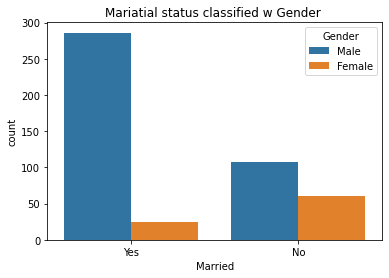

In [56]:
#Married and Gender
sns.countplot(x= 'Married', hue= 'Gender', data= df_clean).set(title= 'Mariatial status classified w Gender ')
plt.show()

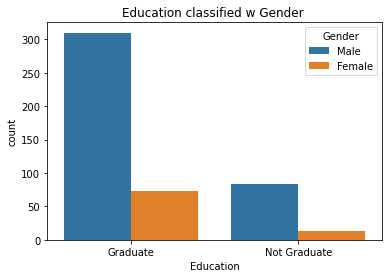

In [57]:
sns.countplot(x= 'Education', hue= 'Gender', data= df_clean).set(title= 'Education classified w Gender ')
plt.show()

[Text(0.5, 1.0, 'Income Of the Applicant')]

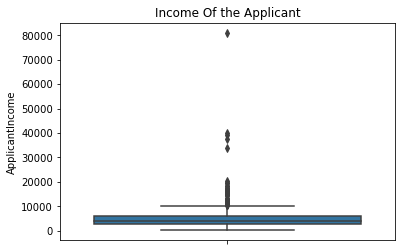

In [60]:
sns.boxplot(y='ApplicantIncome', data= df_clean).set(title='Income Of the Applicant')

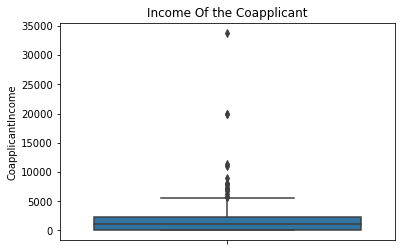

In [62]:
sns.boxplot(y='CoapplicantIncome', data= df_clean).set(title='Income Of the Coapplicant')
plt.show()

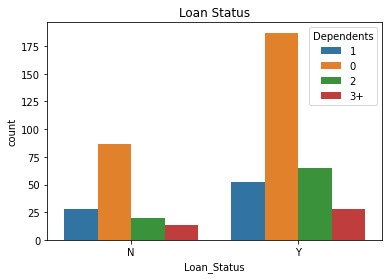

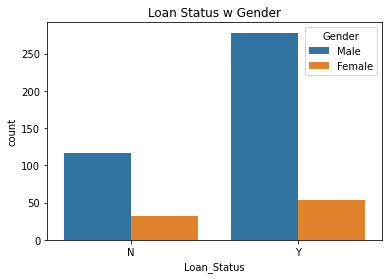

In [71]:
sns.countplot(x='Loan_Status', hue = 'Dependents', data = df_clean).set(title= 'Loan Status')
plt.show()
sns.countplot(x='Loan_Status', hue = 'Gender', data = df_clean).set(title= 'Loan Status w Gender')
plt.show()

In [112]:
df_loan = df_clean.copy()

In [113]:

loan=[]
for i in df_loan["LoanAmount"]:
    if i==0.0:
        loan.append(0)
    elif i>0 and i<=100:
        loan.append(1)
    elif i>100 and i<= 200:
        loan.append(2)
    elif i>200 and i<= 300:
        loan.append(3)
    elif i>300 and i<= 400:
        loan.append(4)
    elif i>400 and i<= 500:
        loan.append(5)
    elif i>500 and i<=600:
        loan.append(6)
    else:
        loan.append(7)
df_loan['LoanAmount']= loan


In [114]:
#Creating Dummy variable for Categorical data
Gender_map = {'Male': 0, 'Female': 1}
Married_map = {'Yes':1, 'No': 0}
SelfEMp_map= {'Yes':1, 'No':0}
Loan_map = {'Y':1, 'N': 0}
Dependent_map = {'0':0,'1':1, '2':2,'3+':3}
Education_map = {'Graduate': 1, 'Not Graduate': 0}

df_loan['Gender']= df_loan['Gender'].map(Gender_map)
df_loan['Married']= df_loan['Married'].map(Married_map)
df_loan['Self_Employed'] = df_loan['Self_Employed'].map(SelfEMp_map)
df_loan['Loan_Status'] = df_loan['Loan_Status'].map(Loan_map)
df_loan['Dependents'] = df_loan['Dependents'].map(Dependent_map)
df_loan['Education']= df_loan['Education'].map(Education_map)

In [117]:
df_train = pd.get_dummies(df_loan, columns=['Property_Area'])
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,0,1,1,1,0,4583,1508.0,2,360.0,1.0,0,1,0,0
2,0,1,0,1,1,3000,0.0,1,360.0,1.0,1,0,0,1
3,0,1,0,0,0,2583,2358.0,2,360.0,1.0,1,0,0,1
4,0,0,0,1,0,6000,0.0,2,360.0,1.0,1,0,0,1
5,0,1,2,1,1,5417,4196.0,3,360.0,1.0,1,0,0,1


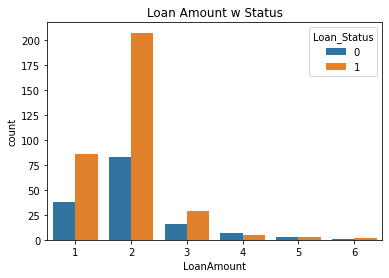

In [120]:
sns.countplot(x='LoanAmount', hue = 'Loan_Status', data = df_loan).set(title= 'Loan Amount w Status')
plt.show()

# Correlation

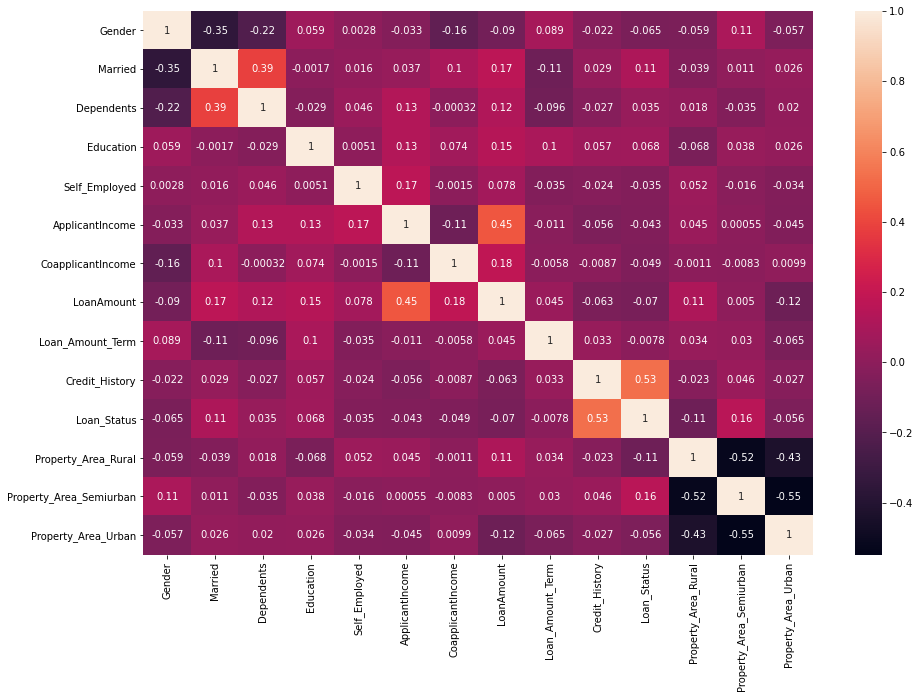

In [119]:
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(df_train.corr(), annot=True, ax=ax)
plt.show()